# Explore here

In [145]:
import pandas as pd
from utils import db_connect
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [146]:
engine = db_connect()

# Consultar la tabla en la base de datos y crear un DataFrame
total_data = pd.read_sql_table('tabla health', engine)

pd.set_option('display.max_columns', None)  # muestra todas las columnas del dataframe
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC,Active Patient Care Primary Care Physicians per 100000 Populati,Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,1048,4.212049,122

In [147]:
total_data.to_csv('/workspaces/regularized-linear-regression/data/raw/demohealth-raw.csv', index=False)

In [148]:
total_data.shape

(3140, 108)

In [149]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [150]:
total_data.isnull().any().any()

False

In [151]:
total_data.duplicated().any()

False

In [152]:
total_data.head()
# Variable objetivo - anycondition

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC,Active Patient Care Primary Care Physicians per 100000 Populati,Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,1048,4.212049,122

In [153]:
total_data.drop(["fips", "0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop",
                 "30-39 y/o % of total pop", "40-49 y/o % of total pop", "50-59 y/o % of total pop",
                 "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop",
                 "% White-alone", "% Black-alone", "% NA/AI-alone", "% Asian-alone", "% Hawaiian/PI-alone",
                 "% Two or more races", "POP_ESTIMATE_2018", "Percent of adults with less than a high school diploma 2014-18",
                 "Percent of adults with a high school diploma only 2014-18", "Percent of adults completing some college or associate's degree",
                 "Percent of adults with a bachelor's degree or higher 2014-18", "Unemployment_rate_2018", "Med_HH_Income_Percent_of_State_Total_2018",
                "Percent of Population Aged 60+", "anycondition_prevalence", "Obesity_prevalence", "Heart disease_prevalence",
                "COPD_prevalence", "diabetes_prevalence", "CKD_prevalence"], axis = 1, inplace = True)
total_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC,Active Patient Care Primary Care Physicians per 100000 Populati,Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,59338,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,Autauga,Alabama,1,1,42438,45.4,49.4,20181,34.2,37.3,15193,7.2,8.7,3345,7.3,9.9,3644,11.9,13.8,5462,2.9,3.3,1326,3
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,57588,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,Baldwin,Alabama,1,3,170912,38.2,42.3,68790,28.4,31.0,50761,7.0,8.7,13414,7.2,10.1,14692,11.0,13.1,20520,3.0,3.5,5479,4
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940,433,34382,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,Barbour,Alabama,1,5,19689,55.6,59.1,11325,39.5,41.9,8013,10.1,11.8,2159,10.7,13.3,2373,18.6,20.6,3870,4.2,4.8,887,6
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,-155,2151,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,4400,21.8,27.8,26.3,46064,41283,50845,8661,8317,344,46064,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,4773,Bibb,Alabama,1,7,17813,49.6,53.4,9190,37.4,40.2,6894,7.9,9.3,1533,8.8,11.3,1789,13.2,14.9,2511,3.1,3.6,595,2
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,13,489,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,7527,13.2,18.0,15.5,50412,46157,54667,25006,24128,878,50412,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,13600,Blount,Alabama,1,9,44448,44.3,48.4,20584,32.4,35.5,15112,8.4,10.1,4101,9.1,12.0,4661,12.6,14.5,6017,3.2,3.7,1507,2


In [154]:
total_data = total_data.rename(columns={'19-Oct': '10-19'})

In [155]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 78 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   TOT_POP                                                          3140 non-null   int64  
 1   0-9                                                              3140 non-null   int64  
 2   10-19                                                            3140 non-null   int64  
 3   20-29                                                            3140 non-null   int64  
 4   30-39                                                            3140 non-null   int64  
 5   40-49                                                            3140 non-null   int64  
 6   50-59                                                            3140 non-null   int64  
 7   60-69                                     

In [156]:
objetos = total_data.select_dtypes(include=['object'])
objetos

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


In [157]:
# Seleccionar solo las columnas numéricas
total_data_num = total_data.select_dtypes(include=['number'])
total_data_num.shape


(3140, 76)

In [158]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.25,25800.5,67913.00,10105518.0
0-9,3140.0,12740.302866,41807.301846,0.0,1280.50,3057.0,8097.00,1208253.0
10-19,3140.0,13367.976752,42284.392134,0.0,1374.50,3274.0,8822.25,1239139.0
20-29,3140.0,14469.331529,49577.725396,0.0,1263.75,3108.0,8976.25,1557073.0
30-39,3140.0,13916.490127,48990.951710,11.0,1232.75,3000.5,8314.25,1501844.0
...,...,...,...,...,...,...,...,...
diabetes_number,3140.0,9326.577707,29754.601185,11.0,1187.75,2743.0,6679.25,952335.0
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.90,3.2,3.50,5.8
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.30,3.7,4.10,6.6
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.75,718.0,1776.25,237766.0


Correlación con la variable objetivo

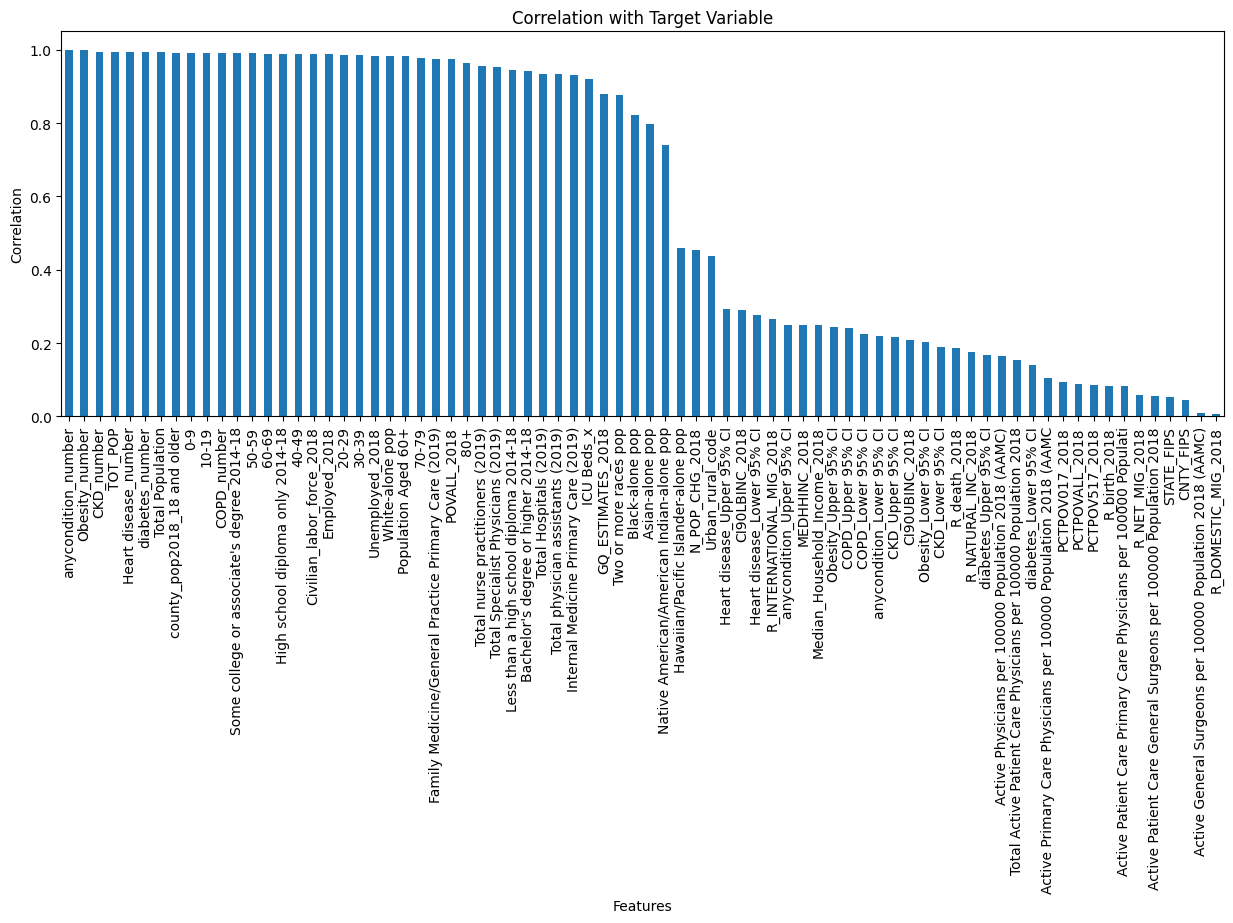

In [159]:
correlation_matrix = total_data_num.corr()

# Ordena las correlaciones por valor absoluto
correlacion_con_vobjetivo = correlation_matrix['anycondition_number'].abs().sort_values(ascending=False)

# Visualiza las correlaciones
plt.figure(figsize=(15, 5))
correlacion_con_vobjetivo.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [160]:
# Filtra las variables con correlación menor de 0.3
borrar_v = correlacion_con_vobjetivo[correlacion_con_vobjetivo < 0.3].index
# Elimina las variables del dataframe
total_data_num.drop(columns=borrar_v, inplace=True)

In [161]:
total_data_num.shape

(3140, 43)

In [162]:
total_data_num.corr()

,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
TOT_POP,1.000000,0.994010,0.994596,0.994558,0.995526,0.998031,0.997000,0.993624,0.980942,0.970889,0.988500,0.798709,0.748573,0.840339,0.478293,0.898469,0.446357,0.889263,0.947348,0.980574,0.991155,0.967693,0.965635,0.998042,0.997751,0.984959,0.963818,0.941826,0.925033,0.941996,0.981254,0.963610,0.910824,0.999650,0.987008,0.999508,0.993514,0.990398,0.987511,0.981495,0.989583,0.993889,-0.428608
0-9,0.994010,1.000000,0.997487,0.989992,0.990971,0.991905,0.985749,0.979333,0.961958,0.946346,0.982072,0.806388,0.756053,0.820614,0.475861,0.889884,0.471608,0.868201,0.946713,0.973324,0.984872,0.947922,0.970050,0.989265,0.988804,0.980304,0.947759,0.929287,0.937499,0.921244,0.972503,0.947638,0.899842,0.992674,0.968462,0.990228,0.991178,0.991474,0.978213,0.972641,0.984664,0.985337,-0.423641
10-19,0.994596,0.997487,1.000000,0.988552,0.987298,0.992803,0.988988,0.982460,0.966966,0.951206,0.988107,0.788605,0.756598,0.817206,0.469966,0.887371,0.482030,0.873025,0.941898,0.972866,0.987834,0.949457,0.962676,0.990490,0.990084,0.980247,0.950055,0.928147,0.933010,0.921620,0.972541,0.947357,0.899026,0.993034,0.972103,0.991161,0.991053,0.990836,0.979115,0.973427,0.982778,0.985221,-0.431290
20-29,0.994558,0.989992,0.988552,1.000000,0.995803,0.991338,0.986506,0.981665,0.964468,0.955231,0.979796,0.799630,0.753746,0.843763,0.482224,0.899288,0.424614,0.908881,0.952755,0.968700,0.982053,0.961699,0.972097,0.992718,0.992286,0.983038,0.953188,0.932138,0.919796,0.935796,0.976138,0.958605,0.913979,0.994654,0.973379,0.994204,0.986197,0.983675,0.975333,0.970200,0.983440,0.986895,-0.412556
30-39,0.995526,0.990971,0.987298,0.995803,1.000000,0.995385,0.988790,0.983050,0.965318,0.955137,0.978264,0.804084,0.746601,0.854027,0.482416,0.900288,0.436221,0.889111,0.948777,0.968551,0.981076,0.970641,0.965289,0.995493,0.995252,0.981297,0.953785,0.934404,0.923866,0.936311,0.977117,0.958650,0.908021,0.995246,0.974168,0.995198,0.985536,0.983254,0.974876,0.968085,0.982978,0.985851,-0.414211
40-49,0.998031,0.991905,0.992803,0.991338,0.995385,1.000000,0.996229,0.989045,0.974370,0.963603,0.985682,0.790771,0.744044,0.852437,0.477135,0.896319,0.449529,0.875403,0.949198,0.973548,0.986982,0.969192,0.958807,0.997642,0.997418,0.983027,0.957894,0.935673,0.919063,0.935080,0.976839,0.957102,0.899891,0.997481,0.981004,0.997460,0.988933,0.985814,0.981209,0.973637,0.987094,0.989692,-0.420792
50-59,0.997000,0.985749,0.988988,0.986506,0.988790,0.996229,1.000000,0.996358,0.985032,0.977812,0.986210,0.791830,0.733091,0.842884,0.469603,0.892944,0.427684,0.882644,0.940256,0.981409,0.989219,0.969900,0.952911,0.996428,0.996251,0.980728,0.968890,0.944649,0.912735,0.948626,0.978776,0.967222,0.904596,0.997281,0.991335,0.997681,0.989680,0.985114,0.987303,0.981090,0.987264,0.991954,-0.434782
60-69,0.993624,0.979333,0.982460,0.981665,0.983050,0.989045,0.996358,1.000000,0.993717,0.986548,0.984358,0.792069,0.731051,0.827293,0.471292,0.892106,0.428818,0.887907,0.927388,0.984756,0.990180,0.967485,0.950705,0.991999,0.991836,0.976082,0.970348,0.946757,0.913867,0.950225,0.980603,0.967737,0.912904,0.993951,0.997694,0.995262,0.989160,0.983584,0.991934,0.987267,0.984204,0.9

In [163]:
data = pd.concat([total_data_num, objetos], axis=1)

Análisis variables categóricas

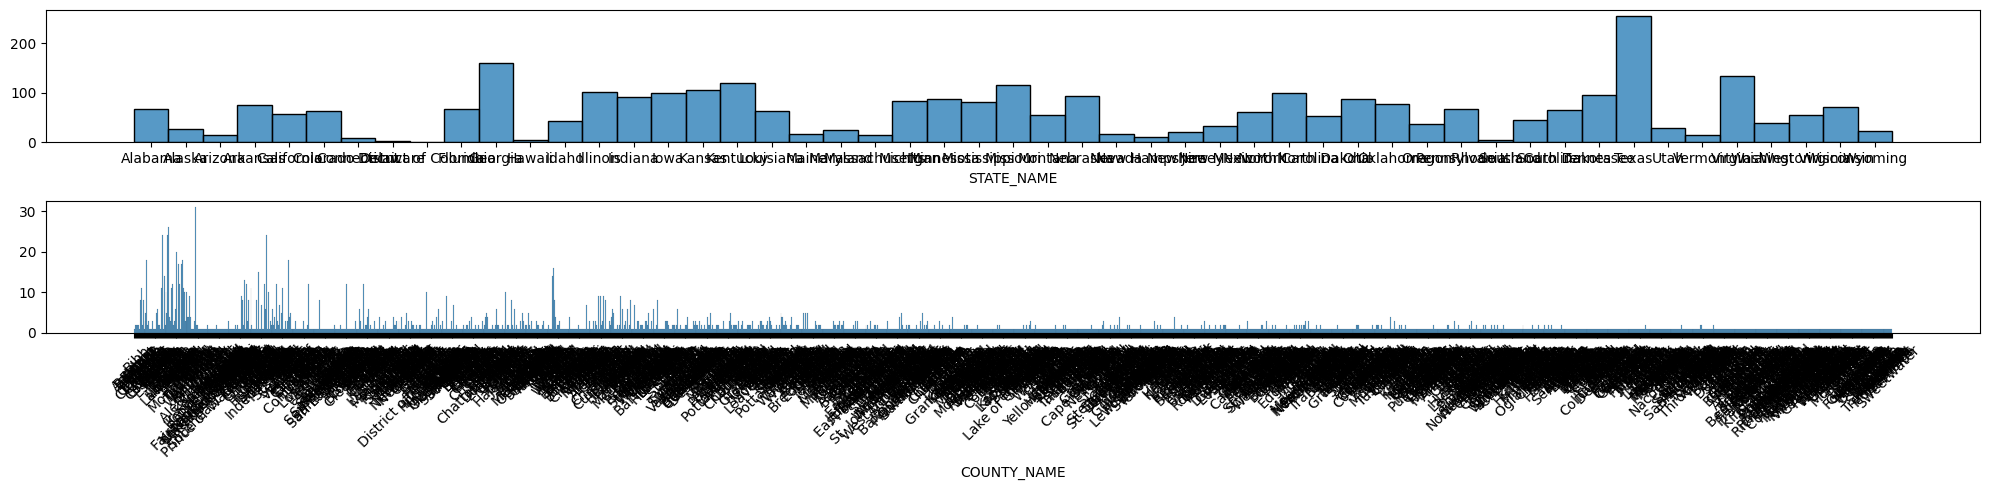

In [164]:
fig, axis = plt.subplots(2, 1, figsize = (20, 5))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = data, x = "STATE_NAME").set(ylabel = None)
sns.histplot(ax = axis[1], data = data, x = "COUNTY_NAME").set(ylabel = None)

# Ajustar el layout
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el plot
plt.show()

Análisis variables numérico-catégoricas

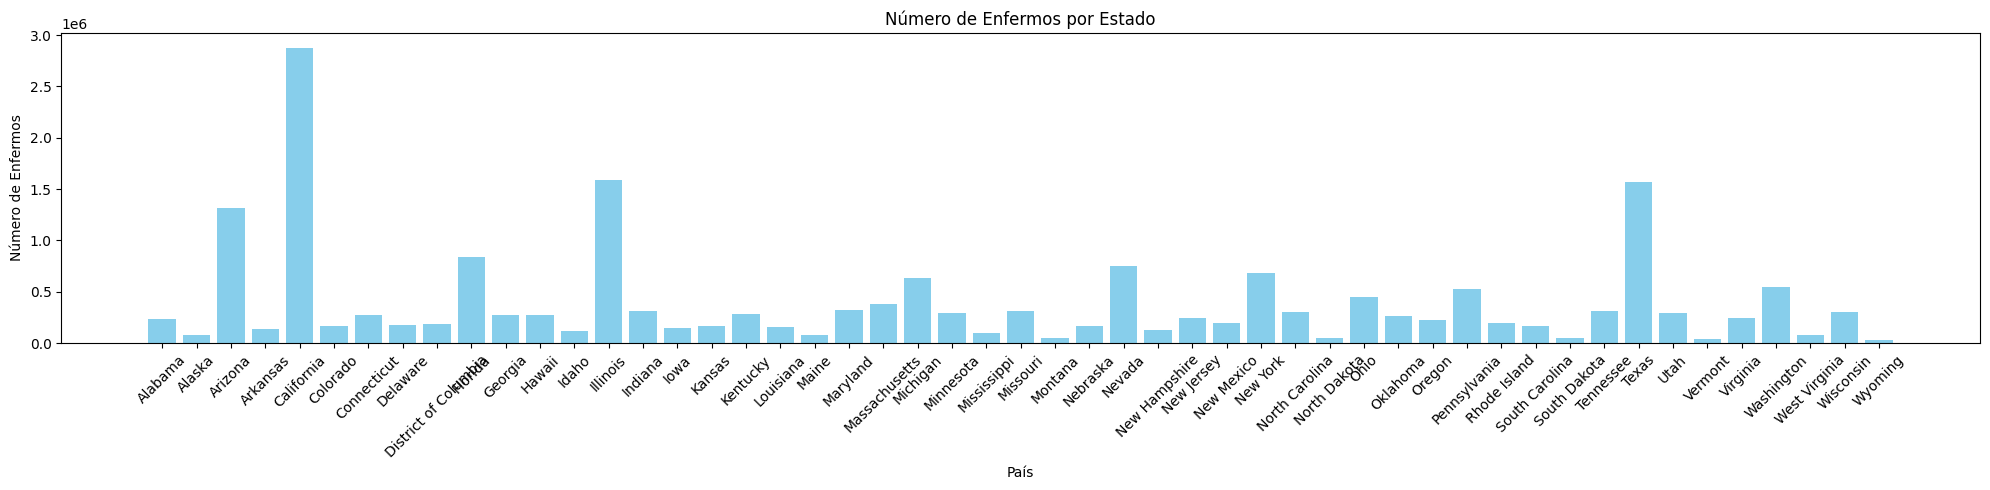

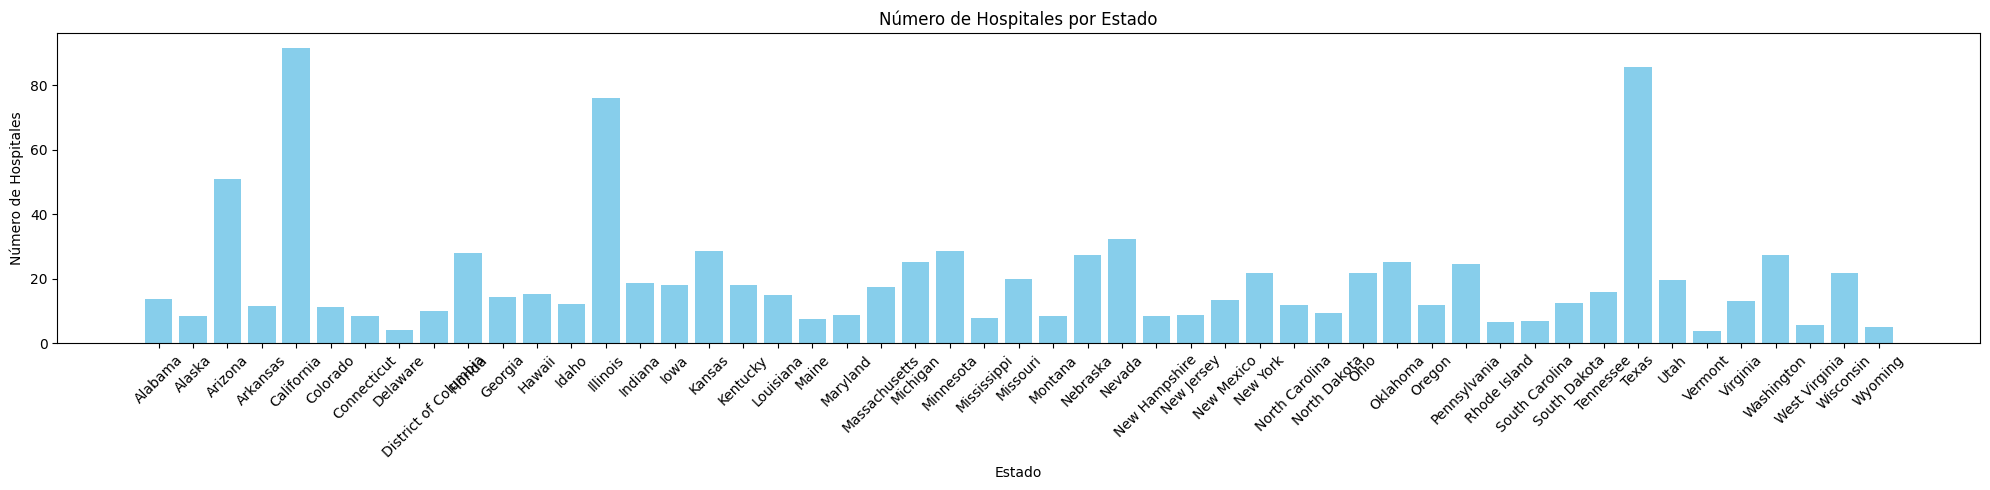

In [165]:
# Extraer las columnas del DataFrame
estados = data['STATE_NAME']
n_enfermos = data['anycondition_number']

# Crear el gráfico de barras
plt.figure(figsize=(20, 5))
plt.bar(estados, n_enfermos, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('País')
plt.ylabel('Número de Enfermos')
plt.title('Número de Enfermos por Estado')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()

#------------------------------------------------------------------------------------------------------

# Extraer las columnas del DataFrame
estados = data['STATE_NAME']
n_enfermos = data['Total Hospitals (2019)']

# Crear el gráfico de barras
plt.figure(figsize=(20, 5))
plt.bar(estados, n_enfermos, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Número de Hospitales')
plt.title('Número de Hospitales por Estado')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()

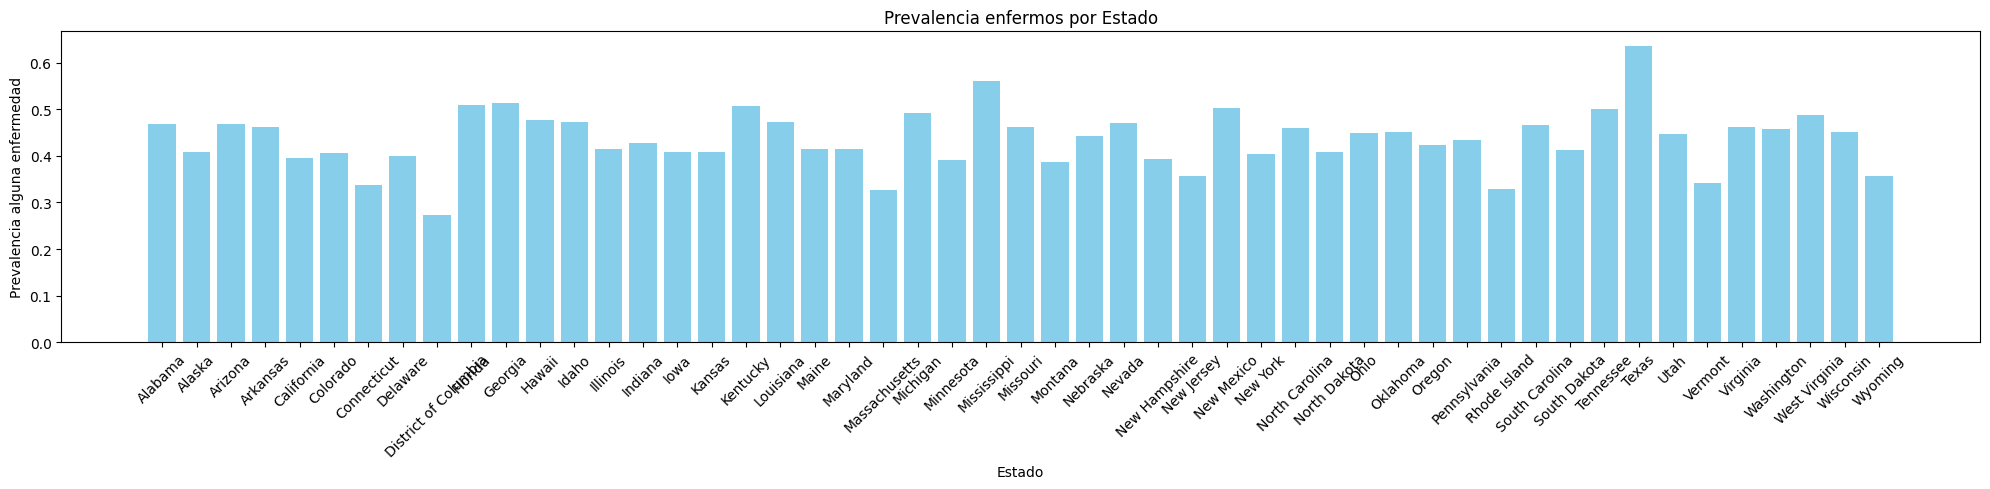

In [166]:
# Extraer las columnas del DataFrame
estados = data['STATE_NAME'] 
p_enfermos = data['anycondition_number'] / data['Total Population']

# Crear el gráfico de barras
plt.figure(figsize=(20, 5))
plt.bar(estados, p_enfermos, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Prevalencia alguna enfermedad')
plt.title('Prevalencia enfermos por Estado')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()



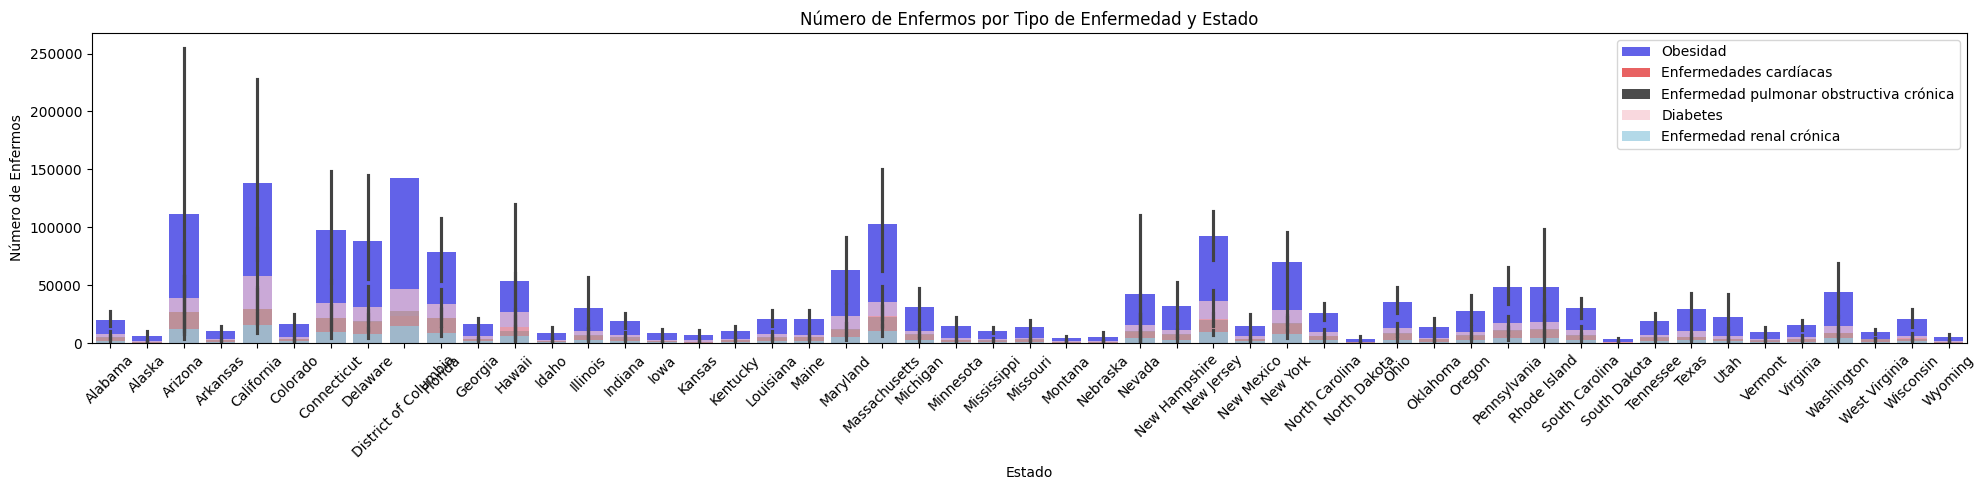

In [167]:
# Configuración del gráfico
plt.figure(figsize=(20, 5))

# Gráfico de barras agrupadas
sns.barplot(x='STATE_NAME', y='Obesity_number', data=data, color='blue', alpha=0.7, label='Obesidad')
sns.barplot(x='STATE_NAME', y='Heart disease_number', data=data, color='red', alpha=0.7, label='Enfermedades cardíacas')
sns.barplot(x='STATE_NAME', y='COPD_number', data=data, color='black', alpha=0.7, label='Enfermedad pulmonar obstructiva crónica')
sns.barplot(x='STATE_NAME', y='diabetes_number', data=data, color='pink', alpha=0.7, label='Diabetes')
sns.barplot(x='STATE_NAME', y='CKD_number', data=data, color='skyblue', alpha=0.7, label='Enfermedad renal crónica')

# Etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Número de Enfermos')
plt.title('Número de Enfermos por Tipo de Enfermedad y Estado')
plt.legend()

plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()

In [168]:
zero_locations = data.isin([0])
zero_indices = zero_locations[zero_locations.any(axis=1)].stack()[lambda x: x].index.tolist()
zero_indices

[(3, 'ICU Beds_x'),
 (5, 'ICU Beds_x'),
 (8, 'ICU Beds_x'),
 (9, 'ICU Beds_x'),
 (11, 'Hawaiian/Pacific Islander-alone pop'),
 (11, 'ICU Beds_x'),
 (12, 'ICU Beds_x'),
 (13, 'Hawaiian/Pacific Islander-alone pop'),
 (14, 'ICU Beds_x'),
 (17, 'ICU Beds_x'),
 (18, 'ICU Beds_x'),
 (20, 'ICU Beds_x'),
 (28, 'Hawaiian/Pacific Islander-alone pop'),
 (31, 'Hawaiian/Pacific Islander-alone pop'),
 (31, 'ICU Beds_x'),
 (32, 'ICU Beds_x'),
 (33, 'ICU Beds_x'),
 (37, 'ICU Beds_x'),
 (42, 'ICU Beds_x'),
 (43, 'ICU Beds_x'),
 (52, 'ICU Beds_x'),
 (55, 'ICU Beds_x'),
 (59, 'ICU Beds_x'),
 (64, 'ICU Beds_x'),
 (65, 'ICU Beds_x'),
 (67, 'ICU Beds_x'),
 (69, 'ICU Beds_x'),
 (70, 'ICU Beds_x'),
 (71, 'ICU Beds_x'),
 (72, 'ICU Beds_x'),
 (74, 'Hawaiian/Pacific Islander-alone pop'),
 (74, 'GQ_ESTIMATES_2018'),
 (74, 'ICU Beds_x'),
 (75, 'GQ_ESTIMATES_2018'),
 (75, 'ICU Beds_x'),
 (79, 'ICU Beds_x'),
 (80, 'ICU Beds_x'),
 (81, 'ICU Beds_x'),
 (83, 'ICU Beds_x'),
 (84, 'ICU Beds_x'),
 (85, 'ICU Beds_x'),
 (86

In [169]:
count_zero_ICU = data[data['ICU Beds_x'] == 0]['ICU Beds_x'].count()
print("Número de filas con ICU Beds_x igual a 0:", count_zero_ICU)

Número de filas con ICU Beds_x igual a 0: 1664


In [170]:
estados_sin_camas = data[data['ICU Beds_x'] == 0]['STATE_NAME']
sin_camas = estados_sin_camas.value_counts()

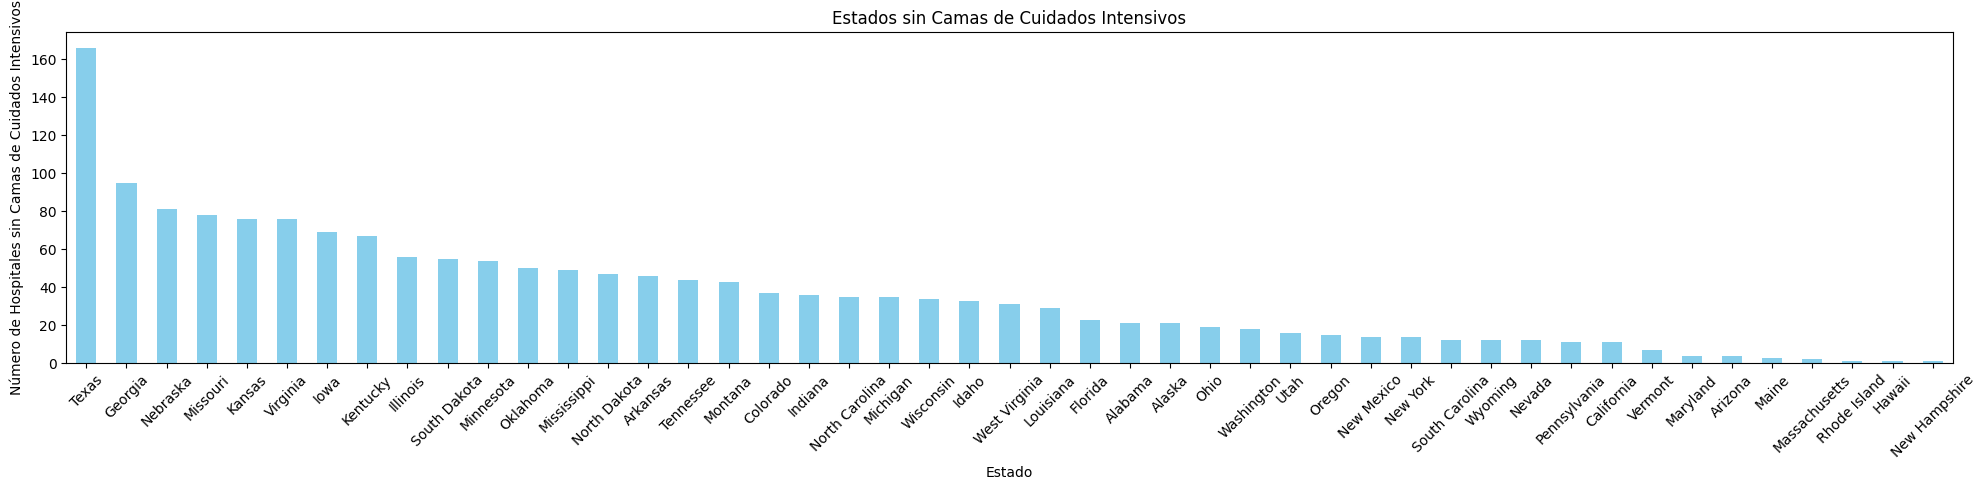

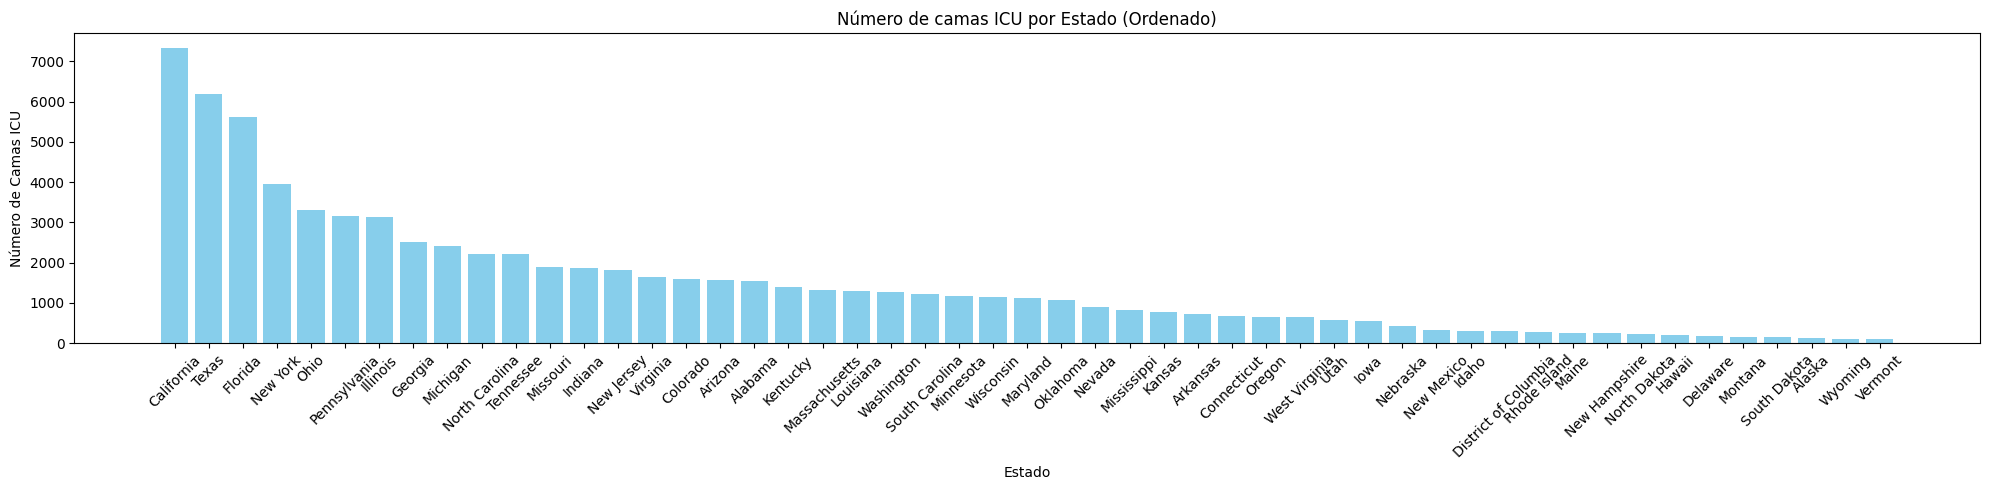

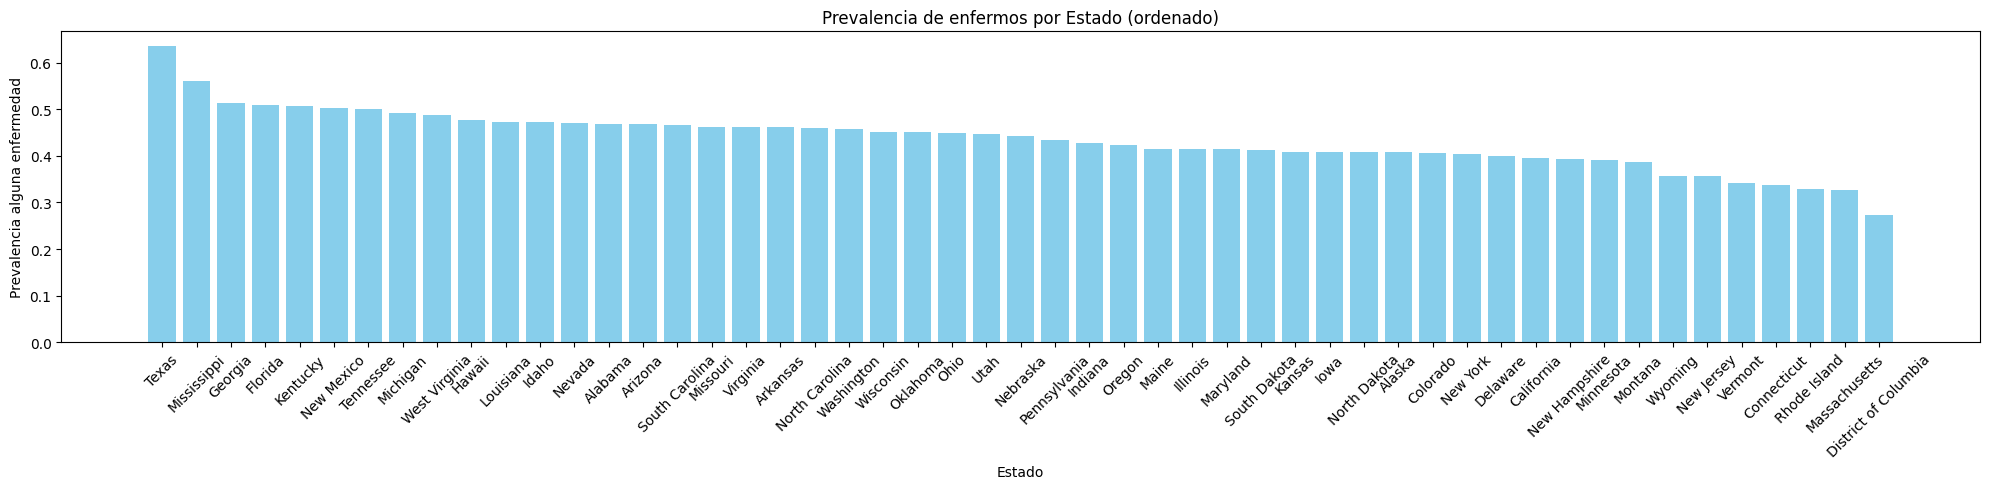

In [171]:
# Crear el gráfico de barras
plt.figure(figsize=(20, 5))
sin_camas.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Número de Hospitales sin Camas de Cuidados Intensivos')
plt.title('Estados sin Camas de Cuidados Intensivos')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()

#------------------------------------------------------------------------------------------

# Agrupar por estado y sumar el número de camas ICU
camas_por_estado = data.groupby('STATE_NAME')['ICU Beds_x'].sum()

# Ordenar los estados de mayor a menor número de camas ICU
camas_por_estado = camas_por_estado.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 5))
plt.bar(camas_por_estado.index, camas_por_estado.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Número de Camas ICU')
plt.title('Número de camas ICU por Estado (Ordenado)')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()

#-------------------------------------------------------------------------------------------


p_enfermos = data['anycondition_number'] / data['Total Population']
estados = data['STATE_NAME']

prevalencia_por_estado = pd.DataFrame({'Estado': estados, 'Prevalencia Enfermos': p_enfermos})

# Ordenar los estados por la prevalencia de enfermos de mayor a menor
prevalencia_ordenada = prevalencia_por_estado.sort_values(by='Prevalencia Enfermos', ascending=False)

# Crear el gráfico de barras con los estados ordenados
plt.figure(figsize=(20, 5))
plt.bar(prevalencia_ordenada['Estado'], prevalencia_ordenada['Prevalencia Enfermos'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Prevalencia alguna enfermedad')
plt.title('Prevalencia de enfermos por Estado (ordenado)')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()

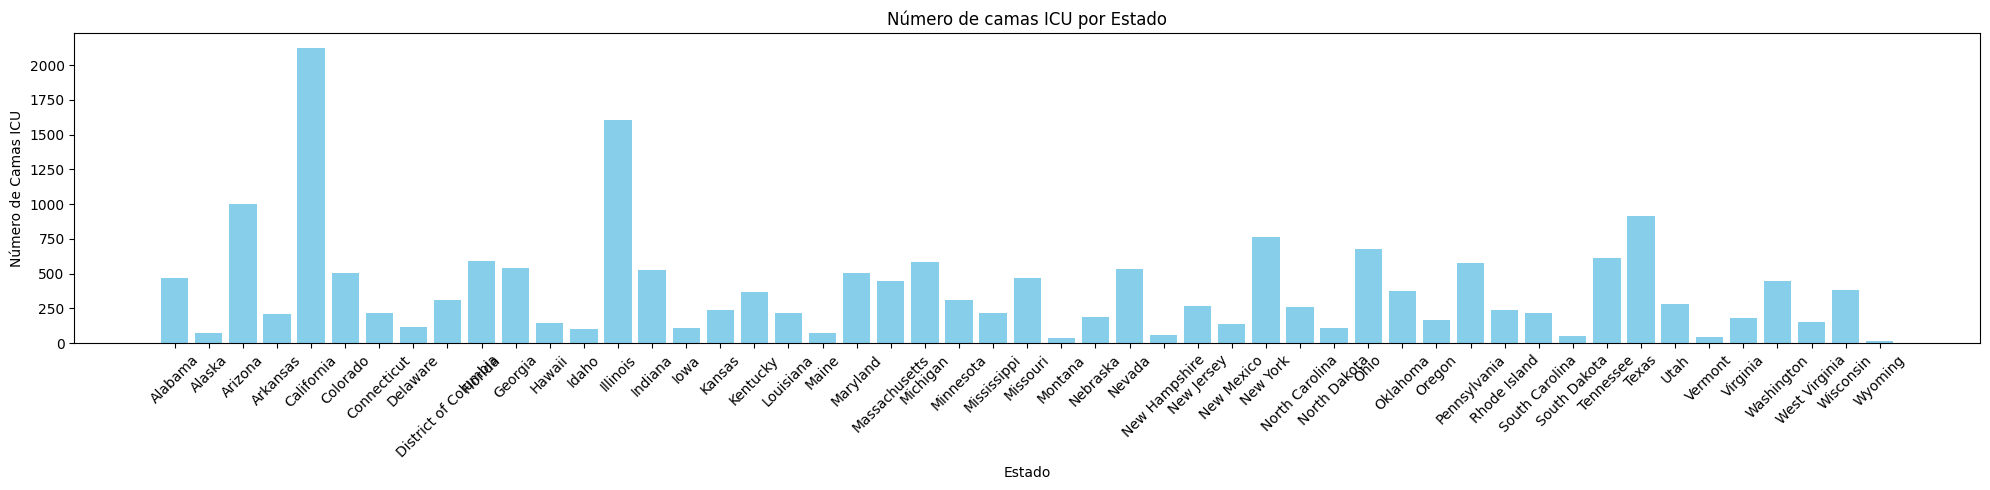

In [172]:
estados = data['STATE_NAME']
n_icu = data['ICU Beds_x']

# Crear el gráfico de barras
plt.figure(figsize=(20, 5))
plt.bar(estados, n_icu, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Número de Camas ICU')
plt.title('Número de camas ICU por Estado')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()


In [173]:
data.drop(['Population Aged 60+', 'county_pop2018_18 and older'], axis=1, inplace=True)

In [174]:
data.head()

,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code,COUNTY_NAME,STATE_NAME
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,158,455,4204,12119,10552,10291,7587,25957,25015,942,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,20181,15193,3345,3644,5462,1326,3,Autauga,Alabama
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,5403,2190,14310,40579,46025,46075,21069,93849,90456,3393,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,68790,50761,13414,14692,20520,5479,4,Baldwin,Alabama
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,-277,2820,4901,6486,4566,2220,6788,8373,7940,433,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,11325,8013,2159,2373,3870,887,6,Barbour,Alabama
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,-155,2151,2650,7471,3846,1813,4400,8661,8317,344,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,9190,6894,1533,1789,2511,595,2,Bibb,Alabama
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,13,489,7861,13489,13267,5010,7527,25006,24128,878,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,20584,15112,4101,4661,6017,1507,2,Blount,Alabama


Análisis de Correlaciones

In [175]:
data[['Employed_2018', 'Unemployed_2018', 'anycondition_number']].corr()

# La correlación entre "Employed_2018" y "Unemployed_2018" es muy alta (0.979277), lo que sugiere una fuerte relación entre el número de empleados y desempleados en 2018. Esto es esperable, ya que la suma de empleados y desempleados debería dar el total de la población activa en un área determinada.

# La correlación entre "Employed_2018" y "anycondition_number" es muy alta (0.987522), lo que sugiere que hay una fuerte relación entre el número de empleados en 2018 y el número total de personas con alguna enfermedad. Esto podría indicar que la salud de la población está relacionada con su situación laboral.

# La correlación entre "Unemployed_2018" y "anycondition_number" también es muy alta (0.983266), lo que sugiere que hay una fuerte relación entre el número de desempleados en 2018 y el número total de personas con alguna enfermedad. Esto podría indicar que el desempleo podría estar relacionado con problemas de salud en la población.

# En resumen, la matriz de correlación sugiere que tanto el empleo como el desempleo pueden estar relacionados con la salud de la población, y que estas variables podrían influirse mutuamente. Sin embargo, es importante recordar que la correlación no implica causalidad, y se necesitarían más análisis para determinar la naturaleza exacta de estas relaciones.

,Employed_2018,Unemployed_2018,anycondition_number
Employed_2018,1.000000,0.979277,0.987522
Unemployed_2018,0.979277,1.000000,0.983266
anycondition_number,0.987522,0.983266,1.000000


Análisis de correlación Grupo etnico - enfermedad

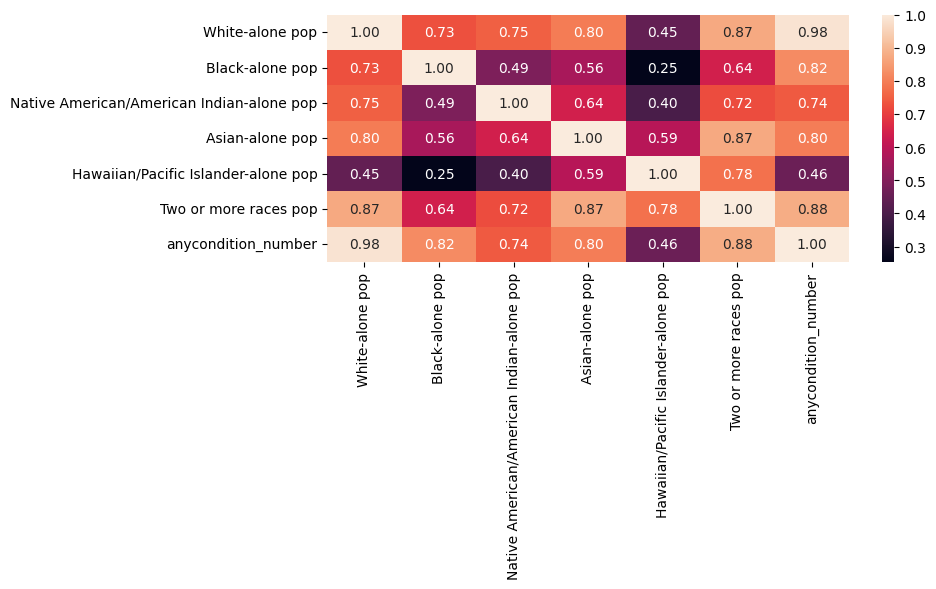

In [176]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop",
                        "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop",
                        "anycondition_number"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Análisis de correlación Nivel de estudios - enfermedad

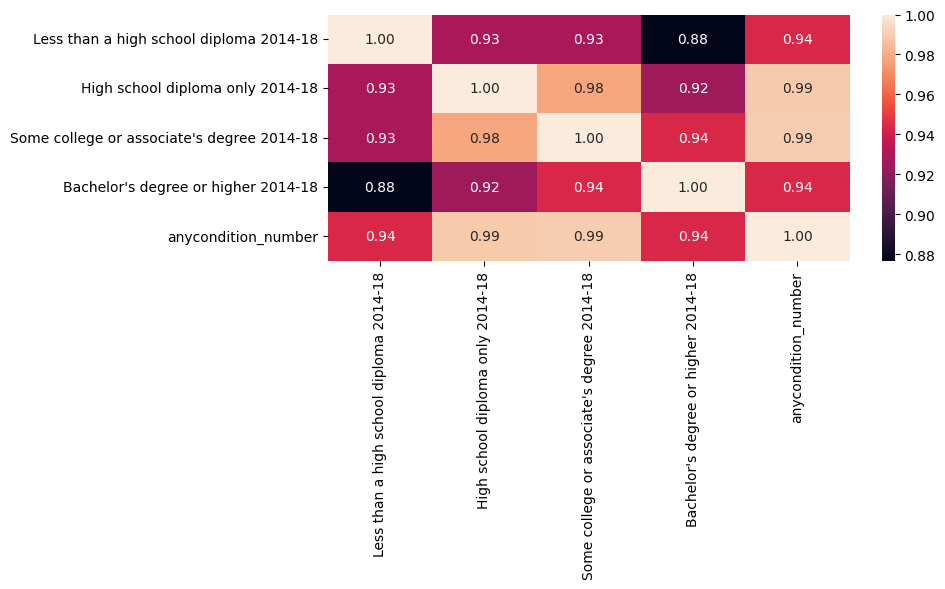

In [177]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Less than a high school diploma 2014-18", "High school diploma only 2014-18",
                        "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
                        "anycondition_number"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Análisis de correlación Personal médico - enfermedad

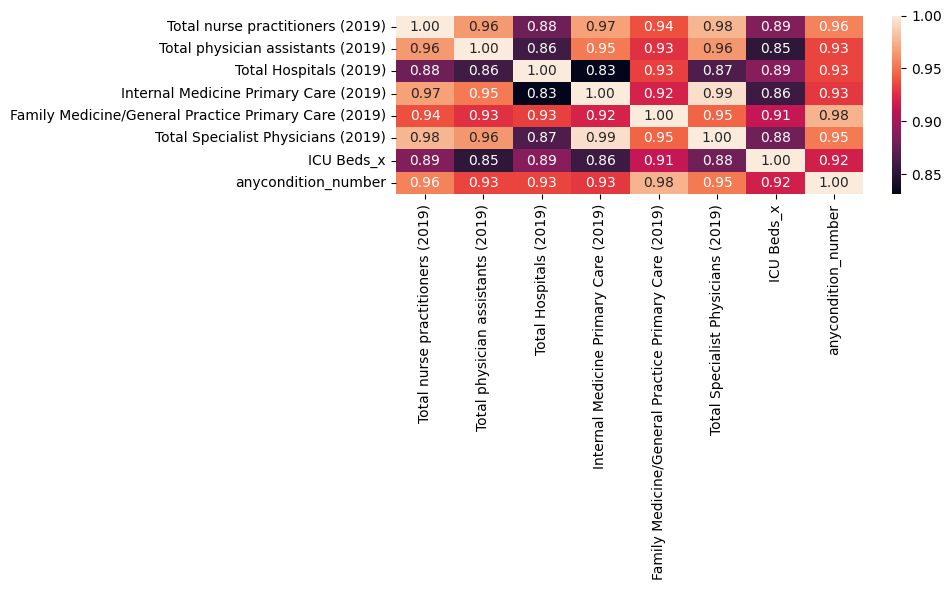

In [178]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Total nurse practitioners (2019)", "Total physician assistants (2019)", "Total Hospitals (2019)",
                        "Internal Medicine Primary Care (2019)", "Family Medicine/General Practice Primary Care (2019)",
                        "Total Specialist Physicians (2019)", "ICU Beds_x", "anycondition_number"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Análisis de correlación Edad - Enfermedad

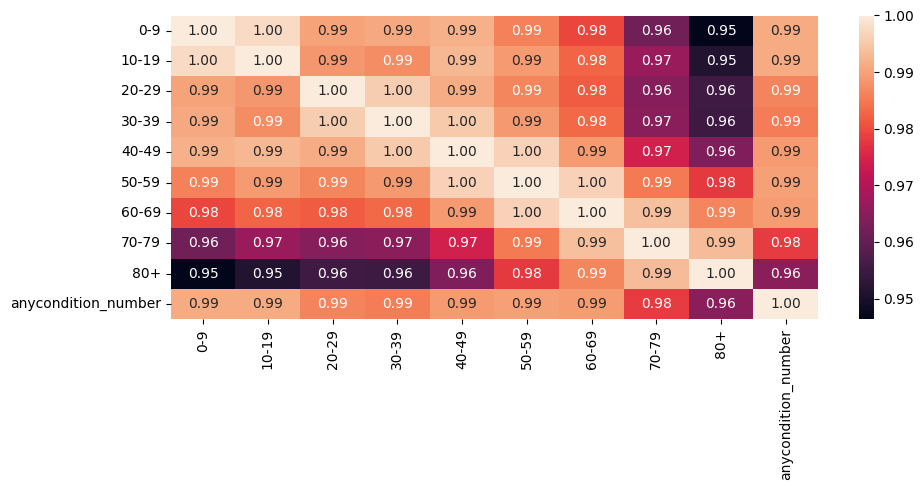

In [179]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.heatmap(data[["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69",
                        "70-79", "80+", "anycondition_number"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Análisis de correlación general

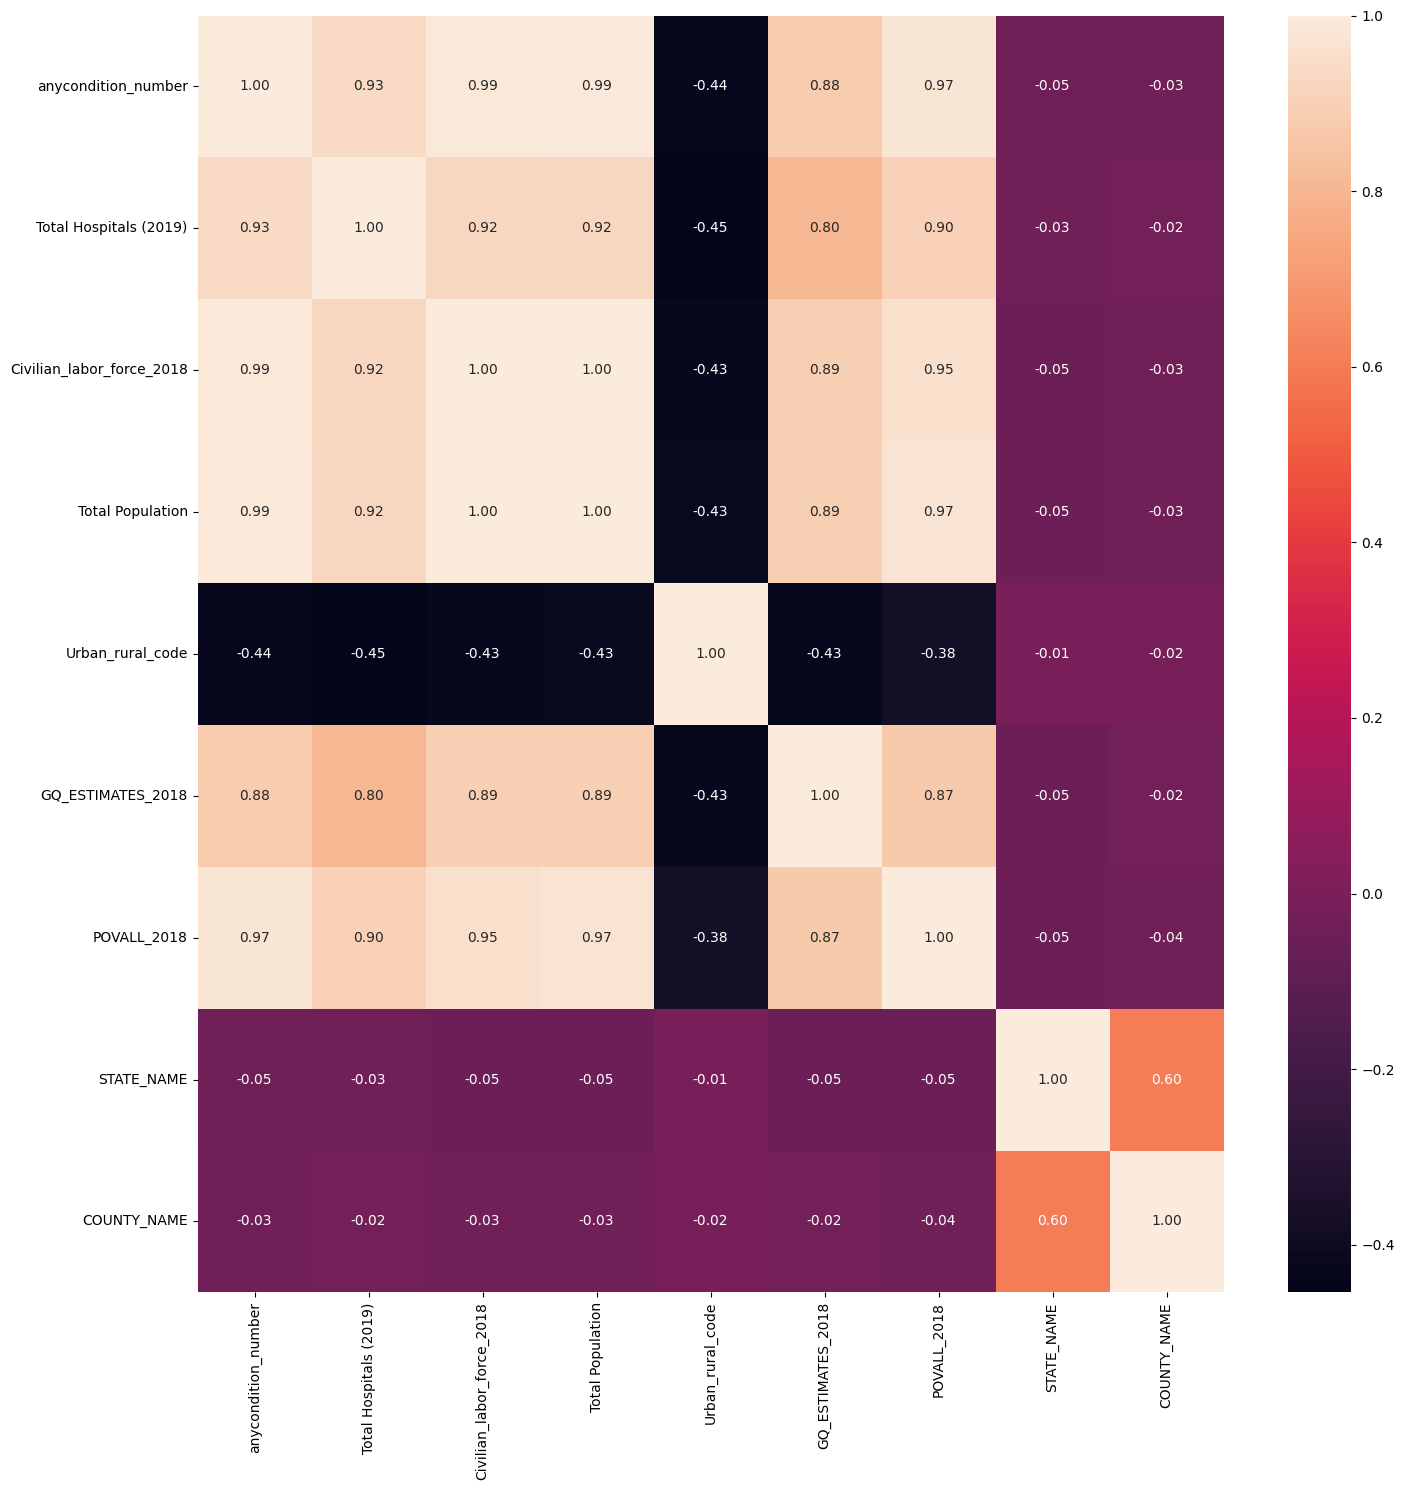

In [180]:
data["STATE_NAME"] = pd.factorize(data["STATE_NAME"])[0]
data["COUNTY_NAME"] = pd.factorize(data["COUNTY_NAME"])[0]

# Crea el heatmap de correlación
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(data[["anycondition_number", "Total Hospitals (2019)", "Civilian_labor_force_2018",	
                        "Total Population", "Urban_rural_code", "GQ_ESTIMATES_2018", "POVALL_2018",
                        "STATE_NAME", "COUNTY_NAME"]].corr(), annot=True, fmt=".2f")
plt.tight_layout()

# Muestra el gráfico
plt.show()

Observamos que la correlación este el estado y el condado con nuestra variable objetivo (presentar alguna condicion médica), es muy débil, casi despreciable. Por tanto, eliminamos la variable 'condado'.

Sin embargo, mantendremos la variable 'estado', ya que a pesar de tener una muy baja correlación, el análisis anterior nos indica que si pueden tener valor predictivo, ya que tanto la pobración, como el numero de enfermos y los recursos sanitarios disponibles varían en función del estado.

In [182]:
data.drop(["COUNTY_NAME"], axis=1, inplace=True)

In [183]:
data.head()

,TOT_POP,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,N_POP_CHG_2018,GQ_ESTIMATES_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code,STATE_NAME
0,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,158,455,4204,12119,10552,10291,7587,25957,25015,942,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,20181,15193,3345,3644,5462,1326,3,0
1,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,5403,2190,14310,40579,46025,46075,21069,93849,90456,3393,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,68790,50761,13414,14692,20520,5479,4,0
2,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,-277,2820,4901,6486,4566,2220,6788,8373,7940,433,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,11325,8013,2159,2373,3870,887,6,0
3,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,-155,2151,2650,7471,3846,1813,4400,8661,8317,344,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,9190,6894,1533,1789,2511,595,2,0
4,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,13,489,7861,13489,13267,5010,7527,25006,24128,878,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,20584,15112,4101,4661,6017,1507,2,0
